- Name : Selim Ozdogan
- Student Id : 300340479

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 


### Html Styles

In [2]:
%%html
<style>
table {margin-left: 0 !important;}
h1, h2, h3, h4 {margin: 0 !important; text-decoration: underline !important}
</style>

### Retreving data

In [3]:
df = pd.read_csv(r'.\Dataset\98-401-X2016044_BRITISH_COLUMBIA_English_CSV_data.csv', low_memory=False)

### Understanding data

In [4]:
print("The data of Census has {} data points and {} features." .format(*df.shape))

The data of Census has 18841095 data points and 14 features.


In [5]:
df.head()

,CENSUS_YEAR,GEO_CODE (POR),GEO_LEVEL,GEO_NAME,GNR,GNR_LF,DATA_QUALITY_FLAG,ALT_GEO_CODE,DIM: Profile of Dissemination Areas (2247),Member ID: Profile of Dissemination Areas (2247),Notes: Profile of Dissemination Areas (2247),Dim: Sex (3): Member ID: [1]: Total - Sex,Dim: Sex (3): Member ID: [2]: Male,Dim: Sex (3): Member ID: [3]: Female
0,2016,1,0,Canada,4.0,5.1,20000,1,"Population, 2016",1,1.0,35151728,...,...
1,2016,1,0,Canada,4.0,5.1,20000,1,"Population, 2011",2,2.0,33476688,...,...
2,2016,1,0,Canada,4.0,5.1,20000,1,"Population percentage change, 2011 to 2016",3,NaN,5.0,...,...
3,2016,1,0,Canada,4.0,5.1,20000,1,Total private dwellings,4,3.0,15412443,...,...
4,2016,1,0,Canada,4.0,5.1,20000,1,Private dwellings occupied by usual residents,5,4.0,14072079,...,...


In [6]:
df.dtypes

CENSUS_YEAR                                           int64
GEO_CODE (POR)                                        int64
GEO_LEVEL                                             int64
GEO_NAME                                             object
GNR                                                 float64
GNR_LF                                              float64
DATA_QUALITY_FLAG                                     int64
ALT_GEO_CODE                                          int64
DIM: Profile of Dissemination Areas (2247)           object
Member ID: Profile of Dissemination Areas (2247)      int64
Notes: Profile of Dissemination Areas (2247)        float64
Dim: Sex (3): Member ID: [1]: Total - Sex            object
Dim: Sex (3): Member ID: [2]: Male                   object
Dim: Sex (3): Member ID: [3]: Female                 object
dtype: object

In [7]:
df.isnull().sum()

CENSUS_YEAR                                                0
GEO_CODE (POR)                                             0
GEO_LEVEL                                                  0
GEO_NAME                                                   0
GNR                                                  1343706
GNR_LF                                               1377411
DATA_QUALITY_FLAG                                          0
ALT_GEO_CODE                                               0
DIM: Profile of Dissemination Areas (2247)                 0
Member ID: Profile of Dissemination Areas (2247)           0
Notes: Profile of Dissemination Areas (2247)        16954470
Dim: Sex (3): Member ID: [1]: Total - Sex                  0
Dim: Sex (3): Member ID: [2]: Male                         0
Dim: Sex (3): Member ID: [3]: Female                       0
dtype: int64

In [8]:
for column in df.columns:
    print('\n',"*"*35,column,"*"*35)
    print(df[column].value_counts())


 *********************************** CENSUS_YEAR ***********************************
2016    18841095
Name: CENSUS_YEAR, dtype: int64

 *********************************** GEO_CODE (POR) ***********************************
59150126    2247
5909060     2247
5909062     2247
5941841     2247
5909056     2247
            ... 
59530087    2247
59152958    2247
59530086    2247
59152957    2247
1           2247
Name: GEO_CODE (POR), Length: 8385, dtype: int64

 *********************************** GEO_LEVEL ***********************************
4    17115399
3     1656039
2       65163
1        2247
0        2247
Name: GEO_LEVEL, dtype: int64

 *********************************** GEO_NAME ***********************************
Northern Rockies    4494
Langley             4494
Nanaimo             4494
Powell River        4494
Alert Bay           4494
                    ... 
59370233            2247
59210248            2247
59150878            2247
Cariboo K           2247
59331579            224

#### The data is Census data for 2016, it is from Canada Stats
It contains only Canada and BC data.

The data dhas 18.8 Million data point and 14 features
- Important data
    - GEO_NAME, it is the location of the data, it has 8375 different locations
    - CENSUS_YEAR, It is year of the data, it is for 2016
    - GEO_LEVEL, it is identify data for Country, Province, or City, 0 means Canada, 1 Means British Columbia etc.
    - Features
        - DIM: Profile of Dissemination Areas (2247), the column has features name, it has 2247 different values
        - Member ID: Profile of Dissemination Areas (2247), the column has id of the features
        - The data's features in the rows, it should be transposed
        - When data is transposed, we have 2247 features
    - Values
        - Dim: Sex (3): Member ID: [1]: Total - Sex, this has value of the featues for all sex group(it is sum of Male and Female columns)
        - Dim: Sex (3): Member ID: [2]: Male, this has value of the featues for Male
        - Dim: Sex (3): Member ID: [3]: Female this has value of the featues for Female
        - Values has some special characters for masking data
            - e.g. x, '...'
- Unnessessary Data
    - 'CENSUS_YEAR'
    - 'GNR'
    - 'DATA_QUALITY_FLAG'
    - 'GNR_LF'
    - 'Notes: Profile of Dissemination Areas (2247)'

### Data Wrangling

- I will drop unnessessary columns
- I will rename some columns for better understamding
- I will transpose the data

In [9]:
columns= ['CENSUS_YEAR',
          'GNR',
          'DATA_QUALITY_FLAG',
          'GNR_LF',
          'GEO_NAME',
          'ALT_GEO_CODE',
          'DIM: Profile of Dissemination Areas (2247)',
          'Notes: Profile of Dissemination Areas (2247)',
          'Dim: Sex (3): Member ID: [2]: Male',
          'Dim: Sex (3): Member ID: [3]: Female']
df.drop(columns, axis=1, inplace= True)

In [10]:
columns= {'GEO_LEVEL':'RegionLevel',
          'GEO_CODE (POR)':'RegionID',
          'Member ID: Profile of Dissemination Areas (2247)':'FeatureID',
          'Dim: Sex (3): Member ID: [1]: Total - Sex':'FeatureValue'
         }
df.rename(columns=columns, inplace=True)

In [11]:
print("The data of Census has {} data points and {} features." .format(*df.shape))
df.head()

The data of Census has 18841095 data points and 4 features.


,RegionID,RegionLevel,FeatureID,FeatureValue
0,1,0,1,35151728
1,1,0,2,33476688
2,1,0,3,5.0
3,1,0,4,15412443
4,1,0,5,14072079


#### Transpose Data
- I will tranpose data and save the temp file for removing unnesssary column or row which are created by pivot

In [12]:
df.reset_index(inplace=True, drop=True)
df = df.pivot(index=['RegionLevel','RegionID'], 
                  columns= 'FeatureID',
                  values='FeatureValue') 
df.to_csv(r'.\dataset\temp.csv')
df =  pd.read_csv(r'.\dataset\temp.csv')

In [13]:
print("The data of Census has {} data points and {} features." .format(*df.shape))

The data of Census has 8385 data points and 2249 features.


In [14]:
df.head()

,RegionLevel,RegionID,1,2,3,4,5,6,7,8,...,2238,2239,2240,2241,2242,2243,2244,2245,2246,2247
0,0,1,35151728,33476688,5.0,15412443,14072079,3.9,8965588.85,35151730,...,372475,32568565,20134760,12433805,6755630,5678175,4296720,3467675,829050,1381460
1,1,59,4648055,4400057,5.6,2063417,1881969,5.0,922503.01,4648055,...,68860,4339960,2490535,1849420,940895,908530,672805,503685,169115,235730
2,2,5901,60439,56685,6.6,34197,25863,2.2,27541.84,60440,...,350,56175,35040,21130,9920,11220,10095,5255,4845,1120
3,2,5903,59517,58441,1.8,30726,27016,2.7,22094.94,59515,...,340,55815,35855,19960,8835,11125,10195,6580,3615,925
4,2,5905,31447,31138,1.0,18321,14339,3.9,8084.52,31445,...,75,29405,19610,9795,3980,5815,5420,3990,1425,400


#### Checking and Dropping data
- When I check Meta file of the data file there is some special symbols
	- .. not available for a specific reference period
    - ... not applicable
    - F	too unreliable to be published
    - x	suppressed to meet the confidentiality requirements of the Statistics Act

In [15]:
# replace symbols to nan
df.replace('x', np.nan, inplace=True)
df.replace('F', np.nan, inplace=True)
df.replace('..', np.nan, inplace=True)
df.replace('...', np.nan, inplace=True)

#convert types to float
for column in df.columns:
    df[column] = df[column].astype(float)

In [16]:
# dropping some columns and rows whics has NaN value above thresh
df.dropna(thresh=5000, axis=1, inplace=True)
df.dropna(thresh=2000, axis=0, inplace=True)


#### Creating Response data which is Transfer money from Goverment
Government transfers - All cash benefits received from federal, provincial, territorial or municipal governments during the reference period. It includes:
 
- Old Age Security pension, Guaranteed Income Supplement, Allowance or Allowance for the Survivor;
- retirement, disability and survivor benefits from Canada Pension Plan and Québec Pension Plan;
- benefits from Employment Insurance and Québec parental insurance plan;
- child benefits from federal and provincial programs;
- social assistance benefits;
- workers' compensation benefits;
- Working income tax benefit;
- Goods and services tax credit and harmonized sales tax credit;
- other income from government sources.

- 679   Number of government transfers recipients aged 15 years and over in private households - 25% sample data
- 680   Average government transfers in 2015 among recipients ($)
- **Total amount = df['679'] * df['680']**

In [17]:
df['GovernmentTransfers'] = df['679'] * df['680']
df.drop(columns=['679','680','RegionID'], axis=1, inplace= True)

### EDA

In [18]:
df.RegionLevel.value_counts()

4.0    7195
3.0     529
2.0      29
1.0       1
0.0       1
Name: RegionLevel, dtype: int64

In [19]:
df.describe().round(2)

,RegionLevel,1,4,5,6,7,8,9,10,11,...,2239,2240,2241,2242,2243,2244,2245,2246,2247,GovernmentTransfers
count,7755.00,7755.00,7755.00,7755.00,7755.00,7755.00,7755.00,7755.00,7755.00,7755.00,...,7755.00,7755.00,7755.00,7755.00,7755.00,7755.00,7755.00,7755.00,7755.00,7.304000e+03
mean,3.92,6928.65,3050.73,2784.82,3460.89,1619.07,6928.65,1109.49,358.62,382.38,...,6437.26,3880.33,2556.88,1356.31,1200.53,900.94,706.84,194.06,299.69,3.124045e+07
std,0.28,403790.22,177042.30,161661.78,7309.85,102421.10,403790.25,66923.68,21754.27,23123.92,...,374191.94,230937.61,143296.52,77725.01,65581.43,49535.47,39905.04,9646.58,16077.24,1.804481e+09
min,0.00,40.00,12.00,12.00,0.00,0.00,40.00,0.00,0.00,0.00,...,40.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.780200e+05
25%,4.00,447.00,180.00,168.00,312.90,0.14,445.00,55.00,15.00,20.00,...,410.00,235.00,140.00,65.00,60.00,40.00,30.00,0.00,0.00,1.717330e+06
50%,4.00,551.00,237.00,219.00,2108.40,0.28,550.00,80.00,25.00,30.00,...,520.00,315.00,205.00,105.00,95.00,75.00,55.00,15.00,15.00,2.373812e+06
75%,4.00,738.00,341.00,310.00,4174.35,1.87,740.00,115.00,35.00,40.00,...,695.00,420.00,305.00,165.00,155.00,120.00,90.00,35.00,40.00,3.407208e+06
max,4.00,35151728.00,15412443.00,14072079.00,454782.60,8965588.85,35151730.00,5839570.00,1898790.00,2018130.00,...,32568565.00,20134760.00,12433805.00,6755630.00,5678175.00,4296720.00,3467675.00,829050.00,1381460.00,1.527646e+11


In [20]:
df.corr()

,RegionLevel,1,4,5,6,7,8,9,10,11,...,2239,2240,2241,2242,2243,2244,2245,2246,2247,GovernmentTransfers
RegionLevel,1.000000,-0.184993,-0.185365,-0.185316,0.118747,-0.179204,-0.184993,-0.182302,-0.181859,-0.182109,...,-0.185187,-0.183349,-0.188096,-0.186287,-0.190212,-0.189791,-0.187589,-0.198589,-0.191137,-0.209344
1,-0.184993,1.000000,0.999983,0.999989,-0.006813,0.996048,1.000000,0.999852,0.999818,0.999822,...,0.999999,0.999945,0.999792,0.999934,0.999474,0.999681,0.999877,0.997201,0.996895,0.999841
4,-0.185365,0.999983,1.000000,0.999998,-0.006735,0.996233,0.999983,0.999819,0.999788,0.999790,...,0.999981,0.999931,0.999768,0.999908,0.999451,0.999704,0.999869,0.997354,0.996729,0.999862
5,-0.185316,0.999989,0.999998,1.000000,-0.006702,0.996110,0.999989,0.999813,0.999781,0.999783,...,0.999989,0.999928,0.999791,0.999925,0.999481,0.999709,0.999874,0.997357,0.996838,0.999844
6,0.118747,-0.006813,-0.006735,-0.006702,1.000000,-0.007476,-0.006813,-0.006839,-0.006730,-0.006854,...,-0.006818,-0.006837,-0.006787,-0.006706,-0.006882,-0.007156,-0.007081,-0.007449,-0.006025,-0.007311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,-0.189791,0.999681,0.999704,0.999709,-0.007156,0.994932,0.999681,0.999198,0.999109,0.999145,...,0.999705,0.999416,0.999876,0.999774,0.999846,1.000000,0.999921,0.998656,0.997429,0.999334
2245,-0.187589,0.999877,0.999869,0.999874,-0.007081,0.995590,0.999877,0.999583,0.999515,0.999544,...,0.999888,0.999721,0.999863,0.999865,0.999709,0.999921,1.000000,0.997928,0.997115,0.999640
2246,-0.198589,0.997201,0.997354,0.997357,-0.007449,0.990552,0.997201,0.995939,0.995759,0.995825,...,0.997277,0.996486,0.998260,0.997727,0.998740,0.998656,0.997928,1.000000,0.997062,0.996402
2247,-0.191137,0.996895,0.996729,0.996838,-0.006025,0.986895,0.996895,0.995619,0.995478,0.995459,...,0.996992,0.996119,0.998107,0.997619,0.998534,0.997429,0.997115,0.997062,1.000000,0.995345


#### Data has some outliners
- Data has different RegionLevel such as country, province, city etc.
- They cause of outliners. We can check with value of 75% and value of max, if they have huge differences, there must be outliners.
- There are some good correlation between features and GovermentTransfer.

#### Correlation
- Some columns have good correation with between GovernmentTransfers and
    - 1. Population, 2016 (1) or
    - 4. Total private dwellings (3) or
    - 5. Private dwellings occupied by usual residents (4)

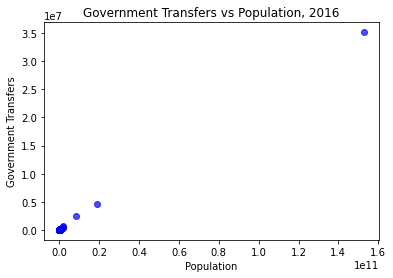

In [21]:
# plot the prediction vs actual
plt.scatter(df['GovernmentTransfers'], df['1'], color='b', alpha=.7)
plt.ylabel('Government Transfers')
plt.xlabel('Population')
plt.title('Government Transfers vs Population, 2016')
plt.show()

#### Government Transfers & Region Level
- Firstly, I will check Region Level

<AxesSubplot:xlabel='GovernmentTransfers', ylabel='Density'>

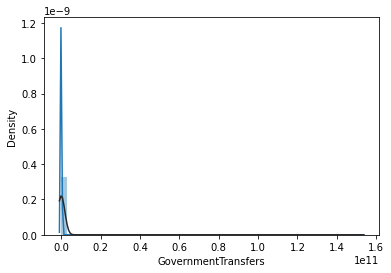

In [22]:
sns.distplot(df.GovernmentTransfers, fit=norm)

Goverment Transfers have right tail

<AxesSubplot:xlabel='RegionLevel', ylabel='Density'>

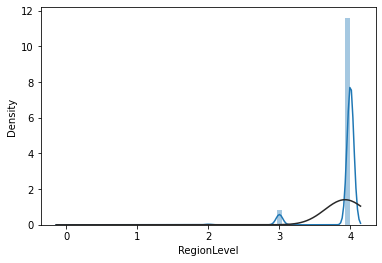

In [23]:
sns.distplot(df.RegionLevel, fit=norm)

If Region Level less than 4, it should be dropped

In [24]:
df.drop(df.loc[df.RegionLevel<4].index, inplace=True)

<AxesSubplot:xlabel='GovernmentTransfers', ylabel='Density'>

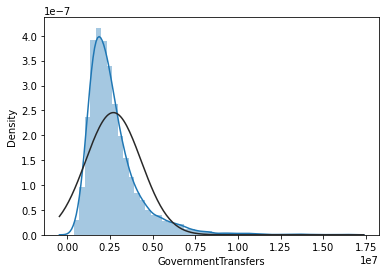

In [25]:
sns.distplot(df.GovernmentTransfers, fit=norm)

**After dropping Region Level, Government Transfers looks better**

#### There are some null values
I will fill them with mean of the column

In [26]:
df.drop(columns='RegionLevel', axis=1, inplace= True)

In [27]:
df.isnull().sum().sum()

56867

In [28]:
df = df.apply(lambda c: c.fillna(c.mean()), axis=0).round(0)

In [29]:
df.shape

(7195, 2244)

In [30]:
df.describe()

,1,4,5,6,7,8,9,10,11,12,...,2239,2240,2241,2242,2243,2244,2245,2246,2247,GovernmentTransfers
count,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,...,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7.195000e+03
mean,644.660459,285.960806,261.206393,3710.198332,120.709104,644.662960,95.993746,30.645587,32.888812,32.482974,...,602.476720,345.706046,256.736623,130.651147,126.015288,93.397498,69.919388,23.432940,32.721334,2.708873e+06
std,419.197926,210.430194,185.972634,7530.249472,1879.876032,419.238425,81.223096,30.313271,28.711392,26.144279,...,390.576945,187.317018,250.603241,128.175036,137.586735,101.668027,81.342343,31.356276,57.671450,1.590821e+06
min,40.000000,12.000000,12.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.780200e+05
25%,451.000000,182.000000,169.000000,535.500000,0.000000,450.000000,55.000000,15.000000,20.000000,20.000000,...,415.000000,240.000000,140.000000,65.000000,60.000000,40.000000,30.000000,0.000000,0.000000,1.714738e+06
50%,547.000000,234.000000,217.000000,2350.000000,0.000000,545.000000,80.000000,25.000000,25.000000,30.000000,...,515.000000,310.000000,205.000000,105.000000,95.000000,70.000000,55.000000,15.000000,15.000000,2.371545e+06
75%,708.000000,322.000000,296.000000,4429.500000,1.000000,710.000000,110.000000,35.000000,40.000000,40.000000,...,665.000000,405.000000,295.000000,160.000000,147.500000,115.000000,85.000000,30.000000,40.000000,3.159140e+06
max,8778.000000,5631.000000,4923.000000,454783.000000,117499.000000,8780.000000,1495.000000,730.000000,515.000000,395.000000,...,8090.000000,2255.000000,6625.000000,3890.000000,2830.000000,2100.000000,1825.000000,680.000000,1425.000000,1.654516e+07


### Store File For other Steps

In [31]:
df.reset_index(inplace=True, drop=True)
df.to_csv(r'.\dataset\cleanedCensusData.csv', index=False)